In [1]:
import pandas as pd
pd.set_option('display.max_columns',999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

In [157]:
df = pd.read_csv('analytic_data2019.csv')

In [225]:
df.head(10)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

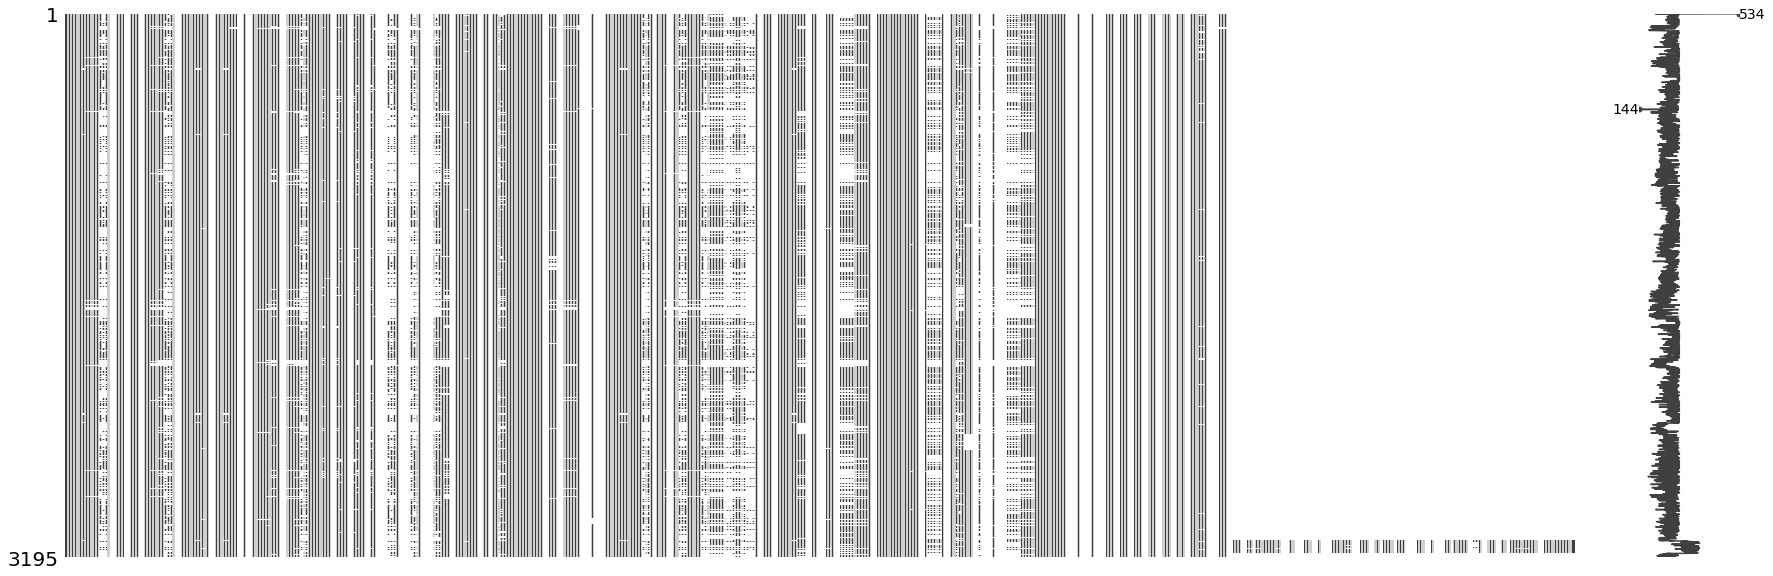

In [159]:
missingno.matrix(df, figsize=(30,10))
plt.show()

In [160]:
len(df.columns)

534

In [161]:
df.drop(df.index[[0]], inplace=True)
df.dropna(axis=0, subset=['County Ranked (Yes=1/No=0)'], inplace=True)

In [162]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [87]:
df2 = df.drop(columns=['State Abbreviation','Name'])

In [88]:
df2 = df2.astype(float)

In [89]:
race_CI = ['White','Black','Hispanic','CI']

for element in race_CI:
    
    df3 = df2[df2.columns.drop(list(df.filter(regex=element)))]

In [90]:
corr = df3.corr()

In [91]:
corr.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Food environment index raw value,Food environment index numerator,Food environment index denominator,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Teen births raw value,Teen births numerator,Teen births denominator,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,Some college raw value,Some college numerator,Some college denominator,Unemployment raw value,Unemployment numerator,Unemployment denominator,Children in poverty raw value,Children in poverty numerator,Children in poverty denominator,Children in poverty (Black),Children in poverty (Hispanic),Children in poverty (White),Income inequality raw value,Income inequality numerator,Income inequality denominator,Children in single-parent households raw value,Children in single-parent households numerator,Children in single-parent households denominator,Social associations raw value,Social associations numerator,Social associations denominator,Violent crime raw value,Violent crime numerator,Violent crime denominator,Injury deaths raw value,Injury deaths numerator,Injury deaths denominator,Air pollution - particulate matter raw value,Air pollution - particulate matter numerator,Air pollution - particulate matter denominator,Drinking water violations raw value,Drinking water violations numerator,Drinking water violations denominator,Severe housing problems raw value,Severe housing problems numerator,Severe housing problems denominator,Percentage of households with high housing costs,Percentage of househol

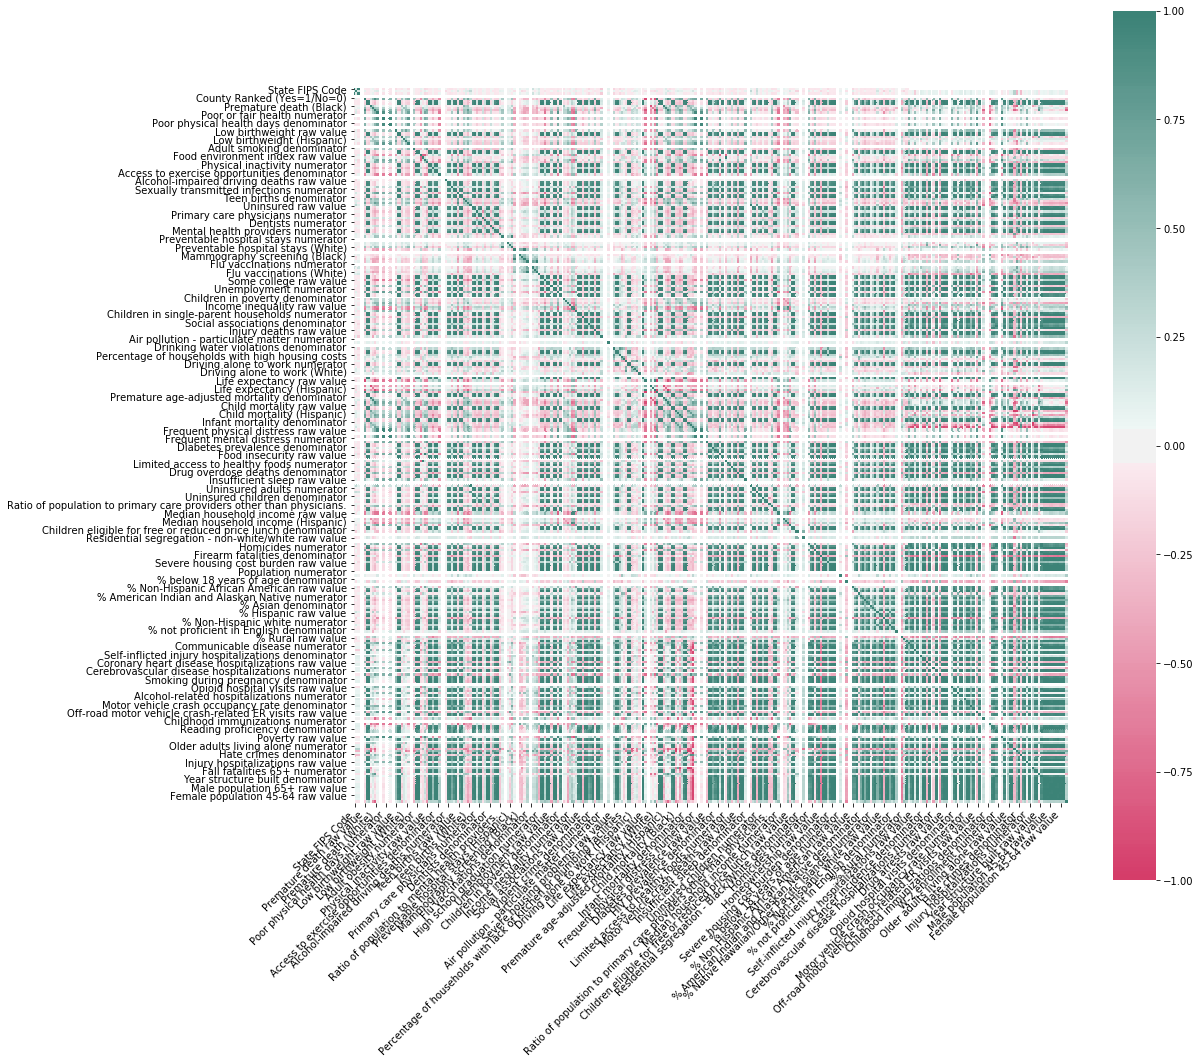

In [92]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(0,534,n=534),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

In [93]:
corr["Flu vaccinations raw value"].abs().sort_values(ascending=False)[:60]

Flu vaccinations raw value                                  1.000000
Flu vaccinations (White)                                    0.972982
Flu vaccinations (Black)                                    0.686193
Hate crimes numerator                                       0.681341
Flu vaccinations (Hispanic)                                 0.619739
Mammography screening (White)                               0.559328
Motor vehicle crash deaths raw value                        0.503616
Disconnected youth raw value                                0.484008
Firearm fatalities raw value                                0.458912
Mammography screening raw value                             0.445823
Homicides raw value                                         0.443958
Premature age-adjusted mortality (Hispanic)                 0.433212
Premature age-adjusted mortality (White)                    0.425293
Childhood immunizations raw value                           0.424479
Reading proficiency numerator     

In [94]:
corr_flu = corr.drop(corr.columns.difference(["Flu vaccinations raw value"]))

In [95]:
len(corr_flu.columns)

344

In [96]:
corr_flu

,State FIPS Code,County FIPS Code,5-digit FIPS Code,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Food environment index raw value,Food environment index numerator,Food environment index denominator,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Teen births raw value,Teen births numerator,Teen births denominator,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,Some college raw value,Some college numerator,Some college denominator,Unemployment raw value,Unemployment numerator,Unemployment denominator,Children in poverty raw value,Children in poverty numerator,Children in poverty denominator,Children in poverty (Black),Children in poverty (Hispanic),Children in poverty (White),Income inequality raw value,Income inequality numerator,Income inequality denominator,Children in single-parent households raw value,Children in single-parent households numerator,Children in single-parent households denominator,Social associations raw value,Social associations numerator,Social associations denominator,Violent crime raw value,Violent crime numerator,Violent crime denominator,Injury deaths raw value,Injury deaths numerator,Injury deaths denominator,Air pollution - particulate matter raw value,Air pollution - particulate matter numerator,Air pollution - particulate matter denominator,Drinking water violations raw value,Drinking water violations numerator,Drinking water violations denominator,Severe housing problems raw value,Severe housing problems numerator,Severe housing problems denominator,Percentage of households with high housing costs,Percentage of househol

In [97]:
corr_flu = corr_flu.dropna(axis=1,how='all')

In [98]:
len(corr_flu.columns)

283

In [99]:
corr_flu_transformed = corr_flu.T

In [100]:
corr_flu_transformed = corr_flu_transformed.abs().sort_values(by="Flu vaccinations raw value", ascending=False)

In [101]:
corr_flu_transformed.drop(corr_flu_transformed[["Flu vaccinations raw value"]], inplace=True)

In [102]:
corr_flu_transformed.head()

,Flu vaccinations raw value
Flu vaccinations (White),0.972982
Flu vaccinations (Black),0.686193
Hate crimes numerator,0.681341
Flu vaccinations (Hispanic),0.619739
Mammography screening (White),0.559328


In [103]:
variables_list = list(corr_flu_transformed.index)

In [104]:
most_correlated_list = variables_list[:100]

# Grouping by State

In [105]:
df3 = df

In [106]:
df3.drop(df3.index[[0]], inplace=True)

In [107]:
cols = df3.columns
cols_included = list(filter(lambda col: col != 'State Abbreviation' and col != 'Name', cols))

for col in cols_included:
    df3[col] = df3[col].astype(float)

In [108]:
df3.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [109]:
df3 = df3.groupby(['State Abbreviation']).mean()

In [110]:
df3 = df3.sort_values(by='Flu vaccinations raw value', ascending=True)
df3 = df3['Flu vaccinations raw value']

In [111]:
df3 = df3.to_frame().head(10)

In [112]:
df3

,Flu vaccinations raw value
State Abbreviation,
AK,0.247500
NV,0.322000
MT,0.333125
ID,0.339762
NM,0.342188
TX,0.349262
NE,0.353544
SD,0.357097
DC,0.360000


In [113]:
lowest_vac_states = list(df3.index)

In [114]:
lowest_vac_states

['AK', 'NV', 'MT', 'ID', 'NM', 'TX', 'NE', 'SD', 'DC', 'AZ']

In [115]:
df4 = df
df4.drop(df4.index[[0]], inplace=True)

df4 = df4[df4['State Abbreviation'].isin(lowest_vac_states)]

In [116]:
df4.head(100)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [117]:
len(df4)

563

In [202]:
df_relevant = df4[['5-digit FIPS Code','State Abbreviation','Name',
            'Sexually transmitted infections raw value',
            'Ratio of population to primary care physicians.','Preventable hospital stays raw value',
            'Preventable hospital stays numerator','Preventable hospital stays denominator',
            'Preventable hospital stays CI low','Preventable hospital stays CI high',
            'Preventable hospital stays (Black)','Preventable hospital stays (Hispanic)',
            'Preventable hospital stays (White)','Flu vaccinations raw value','Flu vaccinations numerator',
            'Flu vaccinations denominator','Flu vaccinations CI low','Flu vaccinations CI high',
            'Flu vaccinations (Black)','Flu vaccinations (Hispanic)','Flu vaccinations (White)',
            'High school graduation raw value','High school graduation numerator',
            'High school graduation denominator','High school graduation CI low',
            'High school graduation CI high','Child abuse raw value','Children in poverty raw value',
            'Smoking during pregnancy raw value','Uninsured adults raw value',
            'Uninsured children raw value']]

In [203]:
df_relevant.head()

,5-digit FIPS Code,State Abbreviation,Name,Sexually transmitted infections raw value,Ratio of population to primary care physicians.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High school graduation CI low,High school graduation CI high,Child abuse raw value,Children in poverty raw value,Smoking during pregnancy raw value,Uninsured adults raw value,Uninsured children raw value
72,2016.0,AK,Aleutians West Census Area,315.7,2823.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933333,42.0,45.0,NaN,NaN,NaN,0.076,NaN,0.229486,0.181159
73,2020.0,AK,Anchorage Borough,827.6,923.195046,2763.0,NaN,NaN,NaN,NaN,4772.0,2648.0,2514.0,0.36,NaN,NaN,NaN,NaN,0.24,0.32,0.37,0.801326,2779.0,3468.0,NaN,NaN,NaN,0.122,NaN,0.145311,0.088223
74,2050.0,AK,Bethel Census Area,2897.6,898.400000,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548276,159.0,290.0,NaN,NaN,NaN,0.355,NaN,0.311695,0.125971
75,2060.0,AK,Bristol Bay Borough,448.4,-898.000000,2063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,30.0,36.0,NaN,NaN,NaN,0.191,NaN,0.240464,0.183333
77,2070.0,AK,Dillingham Census Area,1320.8,381.076923,6230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647727,57.0,88.0,NaN,NaN,NaN,0.314,NaN,0.250755,0.130996


In [204]:
df_relevant.set_index('Name')

,5-digit FIPS Code,State Abbreviation,Sexually transmitted infections raw value,Ratio of population to primary care physicians.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High school graduation CI low,High school graduation CI high,Child abuse raw value,Children in poverty raw value,Smoking during pregnancy raw value,Uninsured adults raw value,Uninsured children raw value
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aleutians West Census Area,2016.0,AK,315.7,2823.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933333,42.000,45.0,NaN,NaN,NaN,0.076,NaN,0.229486,0.181159
Anchorage Borough,2020.0,AK,827.6,923.195046,2763.0,NaN,NaN,NaN,NaN,4772.0,2648.0,2514.0,0.36,NaN,NaN,NaN,NaN,0.24,0.32,0.37,0.801326,2779.000,3468.0,NaN,NaN,NaN,0.122,NaN,0.145311,0.088223
Bethel Census Area,2050.0,AK,2897.6,898.400000,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548276,159.000,290.0,NaN,NaN,NaN,0.355,NaN,0.311695,0.125971
Bristol Bay Borough,2060.0,AK,448.4,-898.000000,2063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,30.000,36.0,NaN,NaN,NaN,0.191,NaN,0.240464,0.183333
Dillingham Census Area,2070.0,AK,1320.8,381.076923,6230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647727,57.000,88.0,NaN,NaN,NaN,0.314,NaN,0.250755,0.130996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood County,48499.0,TX,235.3,2010.318182,4542.0,NaN,NaN,NaN,NaN,5785.0,NaN,4574.0,0.39,NaN,NaN,NaN,NaN,0.33,0.22,0.39,0.967000,408.550,434.0,NaN,NaN,NaN,0.248,NaN,0.230343,0.125601
Yoakum County,48501.0,TX,257.4,2829.333333,5372.0,NaN,NaN,NaN,NaN,NaN,3038.0,5891.0,0.18,NaN,NaN,NaN,NaN,NaN,0.14,0.19,0.986000,157.100,162.0,NaN,NaN,NaN,0.173,NaN,0.284431,0.156618
Young County,48503.0,TX,268.2,1512.666667,5741.0,NaN,NaN,NaN,NaN,NaN,4450.0,5703.0,0.36,NaN,NaN,NaN,NaN,0.27,0.30,0.36,0.961000,233.400,242.0,NaN,NaN,NaN,0.245,NaN,0.248235,0.133014


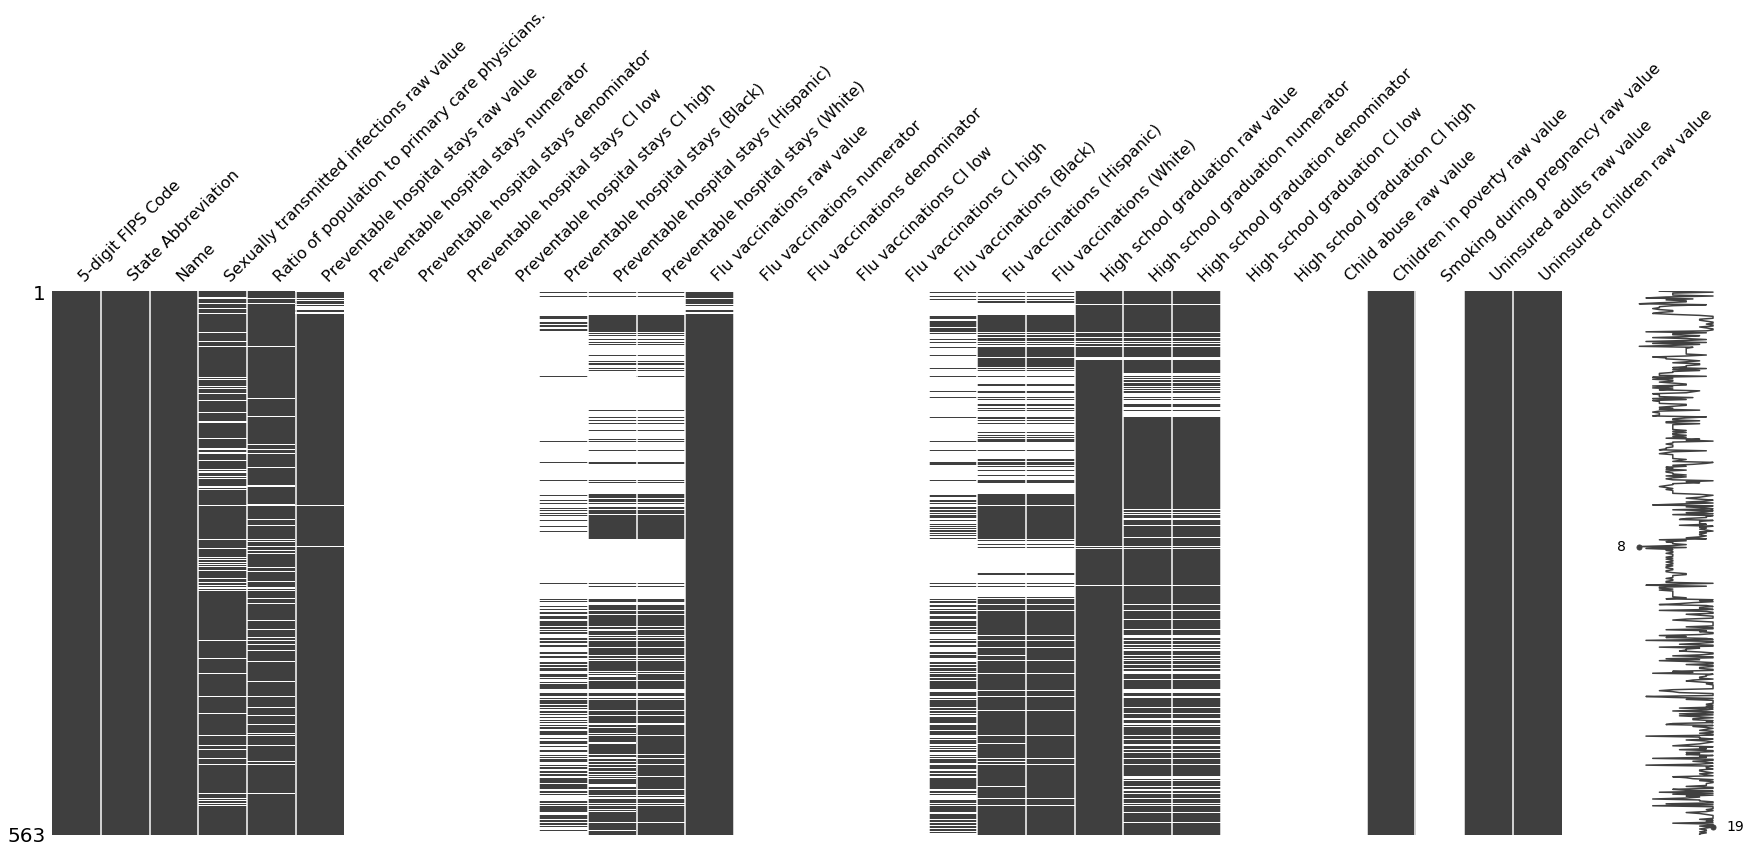

In [205]:
missingno.matrix(df_relevant, figsize=(30,10))
plt.show()

In [206]:
df_relevant.isnull().mean()

5-digit FIPS Code                                  0.000000
State Abbreviation                                 0.000000
Name                                               0.000000
Sexually transmitted infections raw value          0.110124
Ratio of population to primary care physicians.    0.081705
Preventable hospital stays raw value               0.021314
Preventable hospital stays numerator               1.000000
Preventable hospital stays denominator             1.000000
Preventable hospital stays CI low                  1.000000
Preventable hospital stays CI high                 1.000000
Preventable hospital stays (Black)                 0.731794
Preventable hospital stays (Hispanic)              0.523979
Preventable hospital stays (White)                 0.486679
Flu vaccinations raw value                         0.015986
Flu vaccinations numerator                         1.000000
Flu vaccinations denominator                       1.000000
Flu vaccinations CI low                 

In [207]:
df_relevant = df_relevant[df_relevant.columns[df_relevant.isnull().mean() < 0.1]]

In [208]:
df_relevant.isnull().sum()

5-digit FIPS Code                                   0
State Abbreviation                                  0
Name                                                0
Ratio of population to primary care physicians.    46
Preventable hospital stays raw value               12
Flu vaccinations raw value                          9
High school graduation raw value                   12
Children in poverty raw value                       0
Uninsured adults raw value                          0
Uninsured children raw value                        0
dtype: int64

In [209]:
df_relevant.head()

,5-digit FIPS Code,State Abbreviation,Name,Ratio of population to primary care physicians.,Preventable hospital stays raw value,Flu vaccinations raw value,High school graduation raw value,Children in poverty raw value,Uninsured adults raw value,Uninsured children raw value
72,2016.0,AK,Aleutians West Census Area,2823.500000,NaN,NaN,0.933333,0.076,0.229486,0.181159
73,2020.0,AK,Anchorage Borough,923.195046,2763.0,0.36,0.801326,0.122,0.145311,0.088223
74,2050.0,AK,Bethel Census Area,898.400000,818.0,0.12,0.548276,0.355,0.311695,0.125971
75,2060.0,AK,Bristol Bay Borough,-898.000000,2063.0,0.30,0.833333,0.191,0.240464,0.183333
77,2070.0,AK,Dillingham Census Area,381.076923,6230.0,0.21,0.647727,0.314,0.250755,0.130996


In [210]:
df_relevant.set_index('Name')

,5-digit FIPS Code,State Abbreviation,Ratio of population to primary care physicians.,Preventable hospital stays raw value,Flu vaccinations raw value,High school graduation raw value,Children in poverty raw value,Uninsured adults raw value,Uninsured children raw value
Name,,,,,,,,,
Aleutians West Census Area,2016.0,AK,2823.500000,NaN,NaN,0.933333,0.076,0.229486,0.181159
Anchorage Borough,2020.0,AK,923.195046,2763.0,0.36,0.801326,0.122,0.145311,0.088223
Bethel Census Area,2050.0,AK,898.400000,818.0,0.12,0.548276,0.355,0.311695,0.125971
Bristol Bay Borough,2060.0,AK,-898.000000,2063.0,0.30,0.833333,0.191,0.240464,0.183333
Dillingham Census Area,2070.0,AK,381.076923,6230.0,0.21,0.647727,0.314,0.250755,0.130996
...,...,...,...,...,...,...,...,...,...
Wood County,48499.0,TX,2010.318182,4542.0,0.39,0.967000,0.248,0.230343,0.125601
Yoakum County,48501.0,TX,2829.333333,5372.0,0.18,0.986000,0.173,0.284431,0.156618
Young County,48503.0,TX,1512.666667,5741.0,0.36,0.961000,0.245,0.248235,0.133014


In [211]:
flu_vac_rate = df_relevant['Flu vaccinations raw value']
df_relevant.drop(labels='Flu vaccinations raw value', axis=1, inplace=True)
df_relevant.insert(2, 'Flu vaccinations raw value', flu_vac_rate)

In [212]:
df_relevant.set_index('Name')

,5-digit FIPS Code,State Abbreviation,Flu vaccinations raw value,Ratio of population to primary care physicians.,Preventable hospital stays raw value,High school graduation raw value,Children in poverty raw value,Uninsured adults raw value,Uninsured children raw value
Name,,,,,,,,,
Aleutians West Census Area,2016.0,AK,NaN,2823.500000,NaN,0.933333,0.076,0.229486,0.181159
Anchorage Borough,2020.0,AK,0.36,923.195046,2763.0,0.801326,0.122,0.145311,0.088223
Bethel Census Area,2050.0,AK,0.12,898.400000,818.0,0.548276,0.355,0.311695,0.125971
Bristol Bay Borough,2060.0,AK,0.30,-898.000000,2063.0,0.833333,0.191,0.240464,0.183333
Dillingham Census Area,2070.0,AK,0.21,381.076923,6230.0,0.647727,0.314,0.250755,0.130996
...,...,...,...,...,...,...,...,...,...
Wood County,48499.0,TX,0.39,2010.318182,4542.0,0.967000,0.248,0.230343,0.125601
Yoakum County,48501.0,TX,0.18,2829.333333,5372.0,0.986000,0.173,0.284431,0.156618
Young County,48503.0,TX,0.36,1512.666667,5741.0,0.961000,0.245,0.248235,0.133014


In [213]:
# Mammography Screening (White), Children in poverty raw value, 
# Uninsured adults raw value,  Child abuse raw value, 
# Smoking during pregnancy raw value

# Including Religion Dataset

In [228]:
df_religion = pd.read_excel ('US_religion_census_2010.xlsx')

In [229]:
df_religion.head()

,FIPS,STCODE,STABBR,STNAME,CNTYCODE,CNTYNAME,POP2010,TOTCNG,TOTADH,TOTRATE,EVANCNG,EVANADH,EVANRATE,BPRTCNG,BPRTADH,BPRTRATE,MPRTCNG,MPRTADH,MPRTRATE,CATHCNG,CATHADH,CATHRATE,ORTHCNG,ORTHADH,ORTHRATE,OTHCNG,OTHADH,OTHRATE,OCGCNG,AMECNG,AMEADH,AMERATE,AMEZCNG,AMEZADH,AMEZRATE,ALBCNG,ALBADH,ALBRATE,AWMCCNG,AWMCADH,AWMCRATE,ALBPCNG,AMANCNG,AMANADH,AMANRATE,AAMCNG,AAMADH,AAMRATE,AALCCNG,ABACNG,ABAADH,ABARATE,ABCCNG,ABCADH,ABCRATE,ACROCNG,ACROADH,ACRORATE,APCCNG,AMSHCNG,AMSHADH,AMSHRATE,ACNACNG,AOCACNG,AOCAADH,AOCARATE,ACCACNG,ACCAADH,ACCARATE,AFMCNG,AFMADH,AFMRATE,ALCACNG,AACACNG,AACAADH,AACARATE,ARMCNG,ARMADH,ARMRATE,AECCNG,AGCNG,AGADH,AGRATE,AGIFCNG,ARPCCNG,ARPCADH,ARPCRATE,AFLCCNG,AMCCNG,ARBCCNG,BAHCNG,BAHADH,BAHRATE,BAMCCNG,BAMCADH,BAMCRATE,BAMCNG,BAMADH,BAMRATE,BFCCNG,BFCADH,BFCRATE,BPCCNG,BCACNG,BCAADH,BCARATE,BCCCNG,BRUDCNG,BRUDADH,BRUDRATE,BUDMCNG,BUDMADH,BUDMRATE,BUDTCNG,BUDTADH,BUDTRATE,BUDVCNG,BUDVADH,BUDVRATE,BULGCNG,BULGADH,BULGRATE,CCFCCNG,CARCCNG,CTHCNG,CTHADH,CTHRATE,CYMFCNG,CYMFADH,CYMFRATE,CMACNG,CMAADH,CMARATE,CBCNG,CCDCCNG,CCDCADH,CCDCRATE,CCCCCNG,CCCCADH,CCCCRATE,CMECNG,CMEADH,CMERATE,CRCCNG,CRCADH,CRCRATE,CUCNG,CCHCNG,CCSCNG,CGAICNG,CGAIADH,CGAIRATE,CGCTCNG,CGCTADH,CGCTRATE,CG7DCNG,CGFCNG,CGGCCNG,CGGCADH,CGGCRATE,CGCCNG,CGCADH,CGCRATE,CGCMCNG,CGCMADH,CGCMRATE,CGPCNG,CGPADH,CGPRATE,CGAFCNG,CGMACNG,LDSCNG,LDSADH,LDSRATE,CAFCNG,CBRCNG,CBRADH,CBRRATE,CLBACNG,CLBAADH,CLBARATE,CLCCNG,NAZCNG,NAZADH,NAZRATE,CUBCCNG,CUBCADH,CUBCRATE,CHCHCNG,CHCHADH,CHCHRATE,CCCUCNG,CHGNCNG,CHGNADH,CHGNRATE,CRECCNG,COCCNG,COCADH,COCRATE,CCCCNG,CCCADH,CCCRATE,CHCCNG,CHCADH,CHCRATE,CMCCNG,CMCADH,CMCRATE,CBACNG,CCONCNG,CCONADH,CCONRATE,CJUDCNG,CJUDADH,CJUDRATE,CLACNG,CMCOCNG,CMCOADH,CMCORATE,CYFRCNG,CYFRADH,CYFRRATE,OFWBCNG,OFWBADH,OFWBRATE,CWCNG,CWADH,CWRATE,COPTCNG,COPTADH,COPTRATE,CRPCCNG,CUMBCNG,CUMBADH,CUMBRATE,CPCACNG,ELIMCNG,EBACNG,ECCNG,ECADH,ECRATE,EOCNG,EOADH,EORATE,ETHOCNG,EARCNG,EVCHCNG,ECCCNG,ECCADH,ECCRATE,ECOVCNG,ECOVADH,ECOVRATE,EFCACNG,EFCAADH,EFCARATE,EFCICNG,EFCIADH,EFCIRATE,ELCACNG,ELCAADH,ELCARATE,ELSCNG,ELSADH,ELSRATE,EMCCNG,EPCCNG,EPCADH,EPCRATE,FRCCNG,FEBCCNG,FEBCADH,FEBCRATE,FECCNG,FECADH,FECRATE,FOURCNG,FOURADH,FOURRATE,FCSCNG,FMCCNG,FMCADH,FMCRATE,FPCCNG,FRCHCNG,FRNDCNG,FRNDADH,FRNDRATE,FGCCNG,FGCADH,FGCRATE,FUMCNG,FUMADH,FUMRATE,FGBCNG,FBFCNG,GARBCNG,GOPCNG,GOPADH,GOPRATE,FGBCCNG,GGFCNG,GRKCNG,GRKADH,GRKRATE,HRCCNG,HRCADH,HRCRATE,HNICNG,HNIADH,HNIRATE,HNPRCNG,HNPRADH,HNPRRATE,HNRCNG,HNRADH,HNRRATE,HNTTCNG,HNTTADH,HNTTRATE,HOCCNG,HOCADH,HOCRATE,HUNGCNG,HUTTCNG,IBFICNG,IFCACNG,IYMFCNG,IYMFADH,IYMFRATE,ICCCNG,ICCADH,ICCRATE,ICCCCNG,IFBCCNG,INTFCNG,IPCCCNG,IPCCADH,IPCCRATE,IPHCCNG,IPHCADH,IPHCRATE,JAINCNG,JWCNG,KPRSCNG,KPCACNG,KAPCCNG,LCMSCNG,LCMSADH,LCMSRATE,LCMCCNG,LCMCADH,LCMCRATE,MOCCNG,MOCADH,MOCRATE,MALACNG,MALAADH,MALARATE,MOSCCNG,MOSCADH,MOSCRATE,MAMCNG,MAMADH,MAMRATE,MCFCNG,MCFADH,MCFRATE,MENNCNG,MENNADH,MENNRATE,MCCCNG,MCCADH,MCCRATE,MBAMCNG,MBAMADH,MBAMRATE,MCCFCNG,MCCFADH,MCCFRATE,MISSCNG,MISSADH,MISSRATE,MVAKCNG,MVAKADH,MVAKRATE,MVNOCNG,MVNOADH,MVNORATE,MVSOCNG,MVSOADH,MVSORATE,MSLMCNG,MSLMADH,MSLMRATE,NACCCNG,NACCADH,NACCRATE,FWBCNG,FWBADH,FWBRATE,NBCACNG,NBCAADH,NBCARATE,NBCCNG,NBCADH,NBCRATE,NMBCCNG,NMBCADH,NMBCRATE,NSACCNG,NWAPCNG,IBCCNG,NONDCNG,NONDADH,NONDRATE,NABCCNG,NABCADH,NABCRATE,NALCCNG,OORBCNG,OORBADH,OORBRATE,OBSCCNG,OBSCADH,OBSCRATE,OCACNG,OCAADH,OCARATE,OJUDCNG,OJUDADH,OJUDRATE,OPCCNG,OPCADH,OPCRATE,ROCCNG,ROCADH,ROCRATE,PCCCNG,PCCADH,PCCRATE,FBHCCNG,PFWBCNG,PILLCNG,PILLADH,PILLRATE,PNCCCNG,PCCNG,PCADH,PCRATE,PCACNG,PCAADH,PCARATE,PRCCNG,PBEDCNG,PBEDADH,PBEDRATE,PMCCNG,PNBCCNG,PNBCADH,PNBCRATE,PRCACNG,PRCAADH,PRCARATE,RJUDCNG,RJUDADH,RJUDRATE,RFRMCNG,RFRMADH,RFRMRATE,RBCCNG,RCACNG,RCAADH,RCARATE,RCUSCNG,RCUSADH,RCUSRATE,RMCCNG,RMCADH,RMCRATE,RPCCNGV,RPHPCNG,RPUSCNG,RPNACNG,RPNAADH,RPNARATE,ROAACNG,ROAAADH,ROAARATE,ROORCNG,ROORADH,ROORRATE,SALVCNG,SALVADH,SALVRATE,SCHWCNG,SCHWADH,SCHWRATE,SERBCNG,SERBADH,SERBRATE,SDBCNG,SDBADH,SDBRATE,SDACCNG,SDACADH,SDACRATE,SHNTCNG,SIKHCNG,SBCCNG,SBCAD

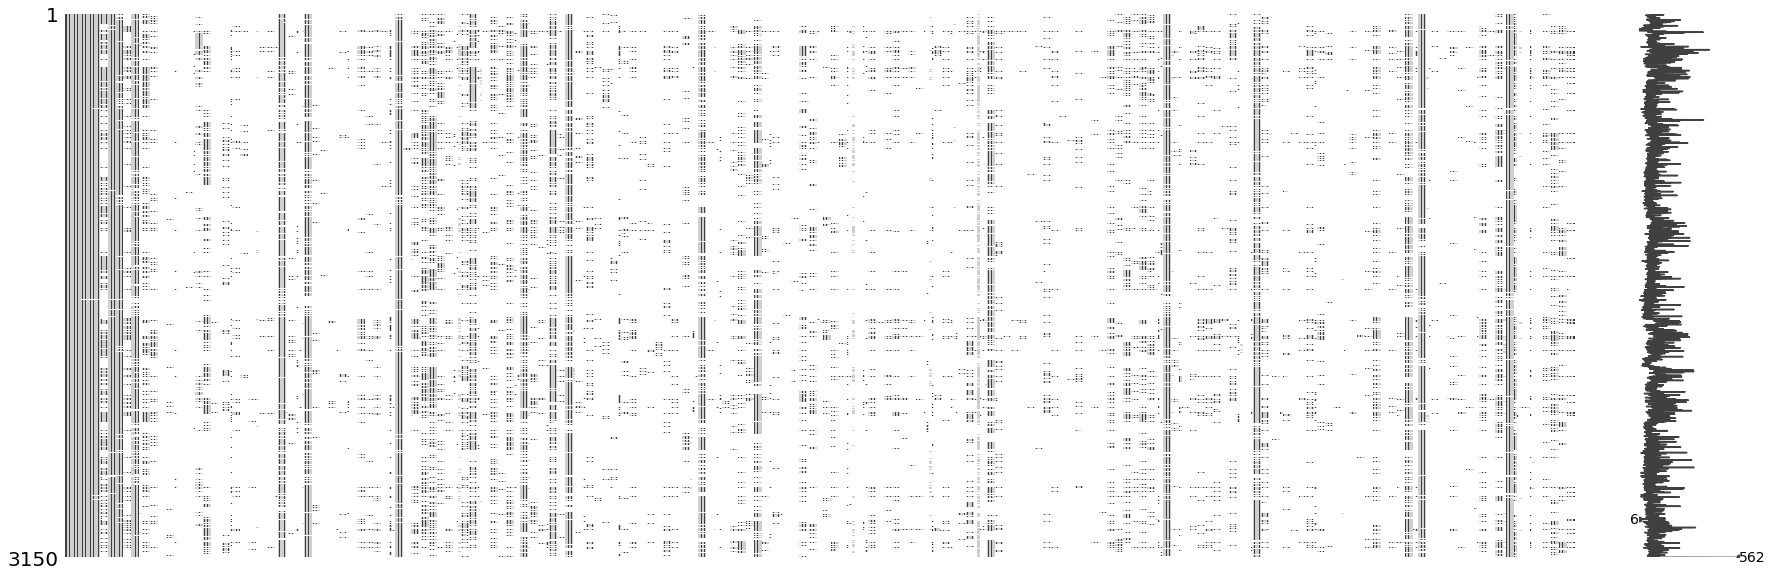

In [230]:
missingno.matrix(df_religion, figsize=(30,10))
plt.show()

In [231]:
df_religion = df_religion[df_religion.columns[df_religion.isnull().mean() < 0.2]]

In [232]:
df_religion.columns

Index(['FIPS', 'STCODE', 'STABBR', 'STNAME', 'CNTYCODE', 'CNTYNAME', 'POP2010',
       'TOTCNG', 'TOTADH', 'TOTRATE', 'EVANCNG', 'EVANADH', 'EVANRATE',
       'MPRTCNG', 'MPRTADH', 'MPRTRATE', 'CATHCNG', 'CATHADH', 'CATHRATE',
       'OTHCNG', 'OTHADH', 'OTHRATE', 'AGCNG', 'AGADH', 'AGRATE', 'BAHCNG',
       'BAHADH', 'BAHRATE', 'CTHCNG', 'CTHADH', 'CTHRATE', 'NONDCNG',
       'NONDADH', 'NONDRATE', 'SBCCNG', 'SBCADH', 'SBCRATE', 'UMCCNG',
       'UMCADH', 'UMCRATE'],
      dtype='object')

In [233]:
df_religion = df_religion[['CNTYNAME','FIPS','EVANRATE']]

In [220]:
df_religion.drop(df_religion.index[[3149]], inplace=True)

In [222]:
df5 = df.merge(df_religion, left_on='5-digit FIPS Code', right_on='FIPS')

In [224]:
df5

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [223]:
len(df5)

2090